In [1]:
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
%matplotlib inline
import squarify                   ## for Treemaps

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [4]:
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 200
Number of features (columns) in the dataset are: 5
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 0


In [5]:
print('\n')
print(df.info())
print('---'*25, '\n', df.describe(include='all').T, '---'*25, '\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
--------------------------------------------------------------------------- 
                         count unique     top freq   mean        std   min  \
CustomerID              200.0    NaN     NaN  NaN  100.5  57.879185   1.0   
Gender                    200      2  Female  112    NaN        NaN   NaN   
Age                     200.0    NaN     NaN  NaN  38.85  13.969007  18.0   
Annual Income (k$)      200.0    NaN     NaN  NaN  60.56  26.264721  15.0   
Spending Sco

In [6]:
## Rename a few variables

df.rename(columns = {'Annual Income (k$)' : 'Income(k$/yr)', 'Spending Score (1-100)' : 'SpendScore(1-100)'}, inplace=True)

## Drop CustomerID variable, as it is redundant in our analysis

df = df.drop(columns=['CustomerID'])

print(df.columns)  ## Check the column names

Index(['Gender', 'Age', 'Income(k$/yr)', 'SpendScore(1-100)'], dtype='object')


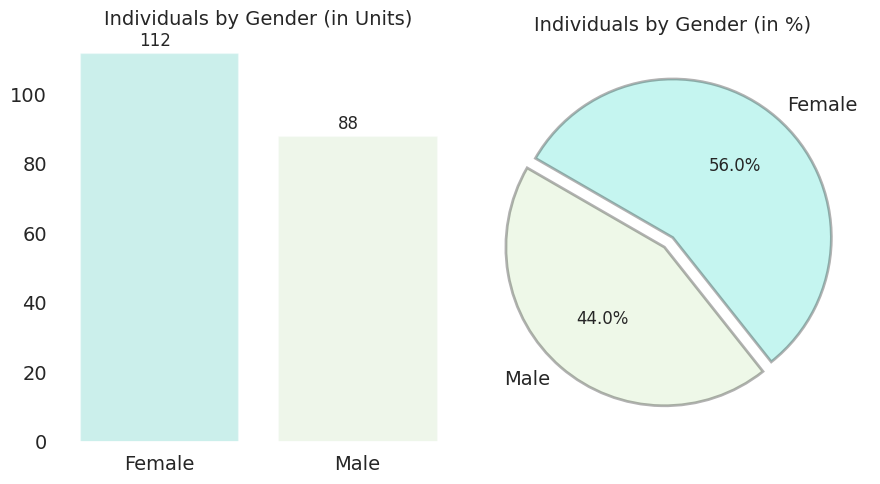

In [7]:
## Gender feature analysis

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(9,5))
my_pal = ('#40E0D0', '#c7e9b4')
my_xpl = [0.0, 0.08]

## Total Individuals by Gender (in Units)
plt.subplot(1,2,1)
plt.title('Individuals by Gender (in Units)', fontsize=14)
ax = sns.countplot(x="Gender", data=df, palette=my_pal, order=df['Gender'].value_counts().index, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))
plt.xlabel(None)
plt.ylabel(None)

## Total Individuals by Gender (in %)
plt.subplot(1,2,2)
plt.title('Individuals by Gender (in %)',fontsize=14)
df['Gender'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')

plt.show()

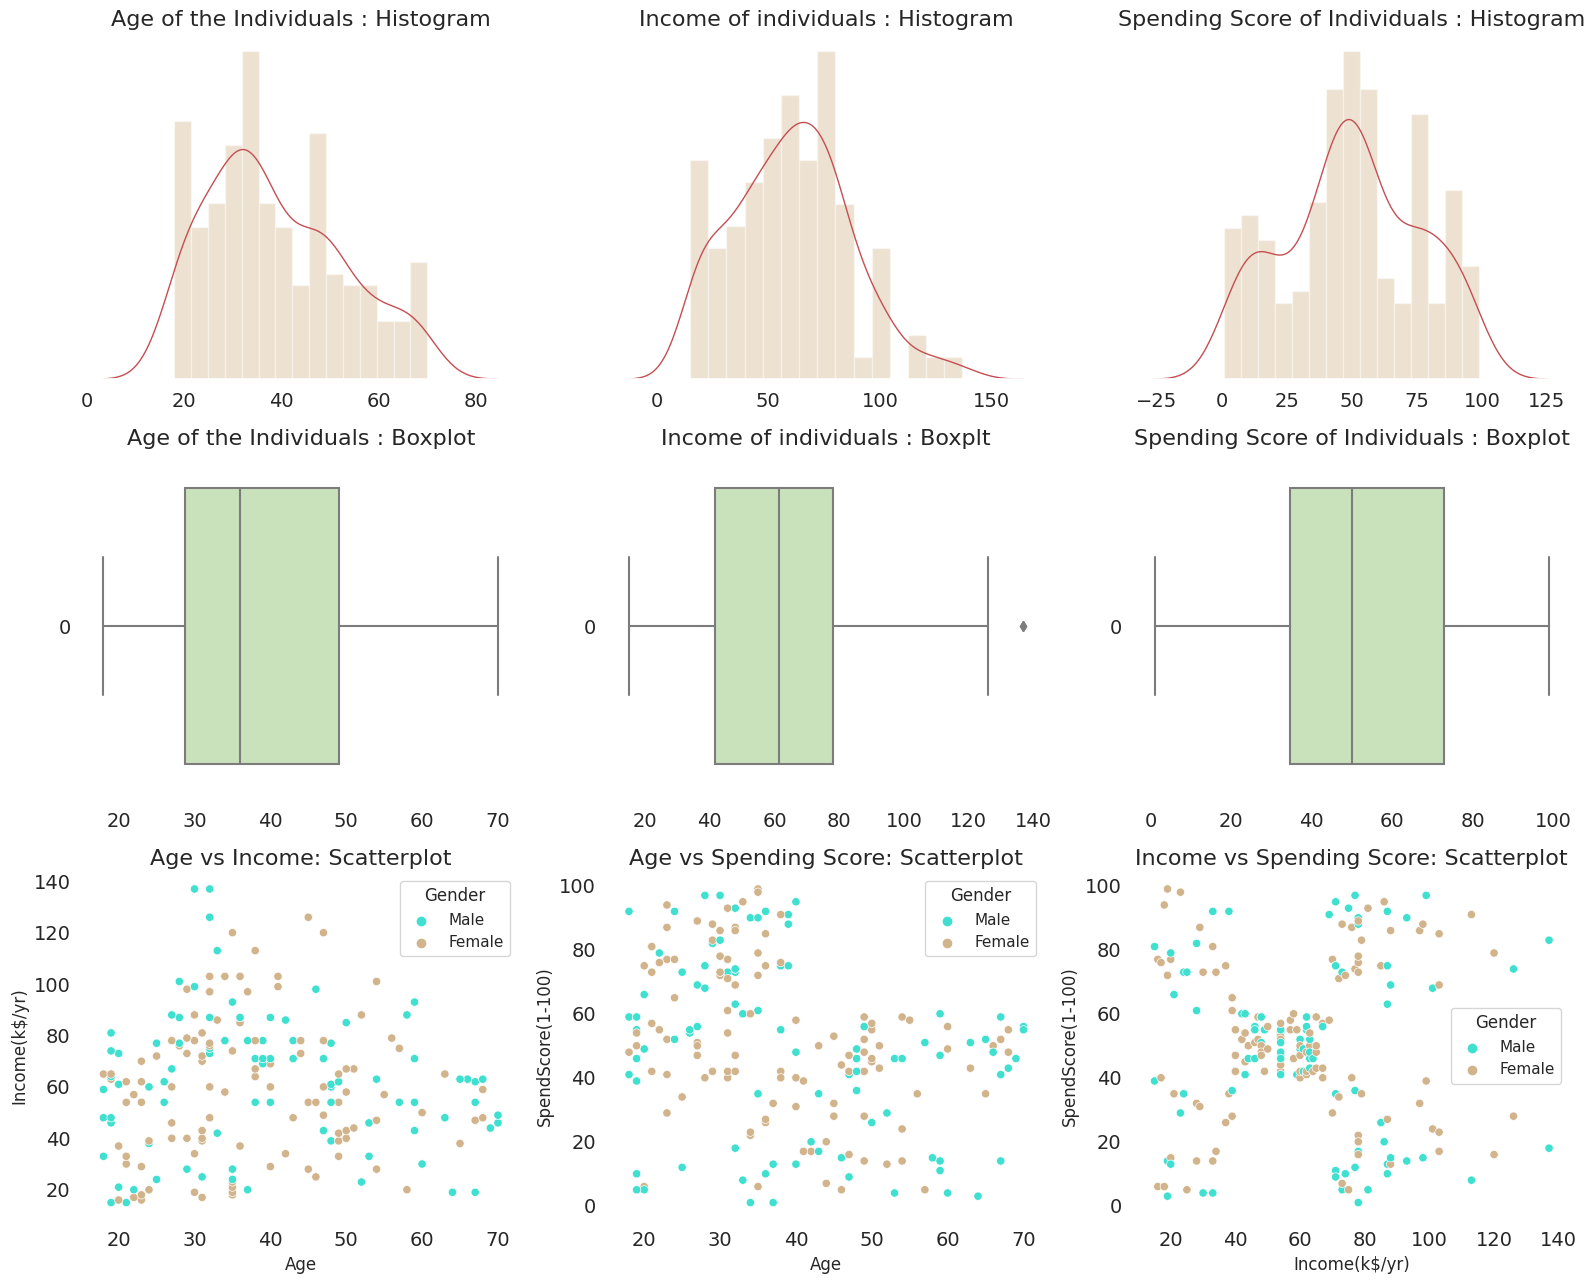

In [8]:
## Let's understand the patterns and trends in the numerical variables
## Age, Income(k$/yr), and SpendScore(1-100) are the 3 numerical variables we have here

plt.subplots(figsize=(16,13))

plt.subplot(3,3,1)
plt.title('Age of the Individuals : Histogram', fontsize=16)
sns.distplot(df['Age'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,2)
plt.title('Income of individuals : Histogram', fontsize=16)
sns.distplot(df['Income(k$/yr)'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,3)
plt.title('Spending Score of Individuals : Histogram', fontsize=16)
sns.distplot(df['SpendScore(1-100)'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,4)
plt.title('Age of the Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Age'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,5)
plt.title('Income of individuals : Boxplt', fontsize=16)
sns.boxplot(df['Income(k$/yr)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,6)
plt.title('Spending Score of Individuals : Boxplot', fontsize=16)
sns.boxplot(df['SpendScore(1-100)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,7)
plt.title('Age vs Income: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Income(k$/yr)', hue='Gender', palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,8)
plt.title('Age vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,9)
plt.title('Income vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Income(k$/yr)', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.show()

In [10]:
## Let's start analysis by creating a subset dataframe

X = df[['Income(k$/yr)', 'SpendScore(1-100)']].copy()
print(X.head(5))

   Income(k$/yr)  SpendScore(1-100)
0             15                 39
1             15                 81
2             16                  6
3             16                 77
4             17                 40


In [11]:
## Scale the features

scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(X)
print(X_kmeans)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [12]:
## Applying the elbow method to determine the number of clusters

wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)

wcss

[400.0,
 270.70426664306717,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.911185549990144,
 37.7364034625416,
 32.37525368158286,
 29.090568897369714]

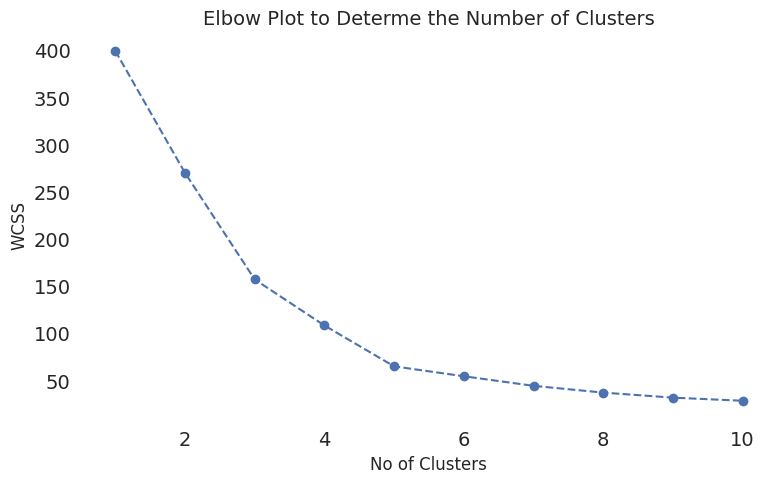

In [13]:
## Plotting the Elbow Plot to determine the ideal number of clusters

plt.figure(figsize=(8,5))

plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Plot to Determe the Number of Clusters', fontsize=14)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

In [14]:
## Identifying the Knee in the Elbow Plot with KneeLocator function
## First install the latest Kneed module 
!pip install --upgrade kneed
from kneed import KneeLocator

In [15]:
## Knee
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)

The Knee located at figure: 5


In [16]:
## Applying the Silhouette method to determine the number of clusters

silhouette_coef = []

for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(X_kmeans)
    score = silhouette_score(X_kmeans, kmeans.labels_)
    silhouette_coef.append(score)

silhouette_coef

[0.28793808282017214,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5380630705007142,
 0.5263454490712252,
 0.45644093438859246,
 0.45528744061049026,
 0.4494227762558826]

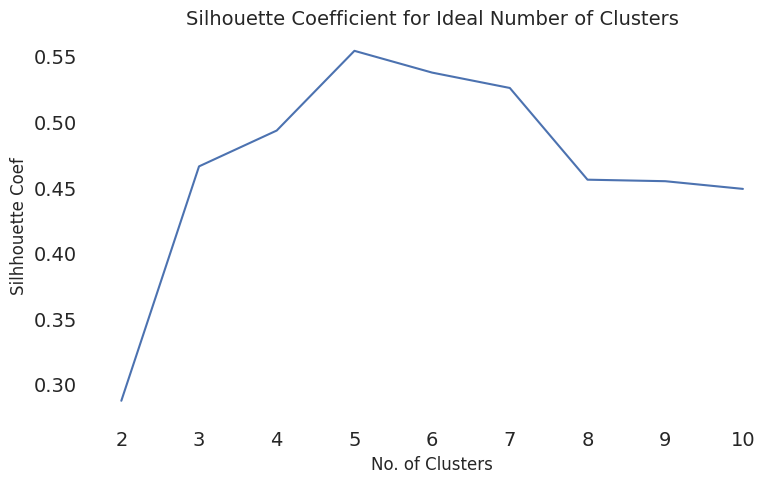

In [17]:
## Plot the Silhouette Coefficient data

plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_coef)
plt.xticks(range(2,11))
plt.title('Silhouette Coefficient for Ideal Number of Clusters', fontsize=14)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhhouette Coef')
plt.show()

In [18]:
## Model fitting with 5 clusters 

clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [19]:
## Creating a New Dataframe with an appended cluster column

df_Kmeans = df.copy()            ## making a copy of original dataframe
df_Kmeans['Cluster'] = y_kmeans  ## appending the cluster column
print(df_Kmeans.head(5))

   Gender  Age  Income(k$/yr)  SpendScore(1-100)  Cluster
0    Male   19             15                 39        2
1    Male   21             15                 81        3
2  Female   20             16                  6        2
3  Female   23             16                 77        3
4  Female   31             17                 40        2


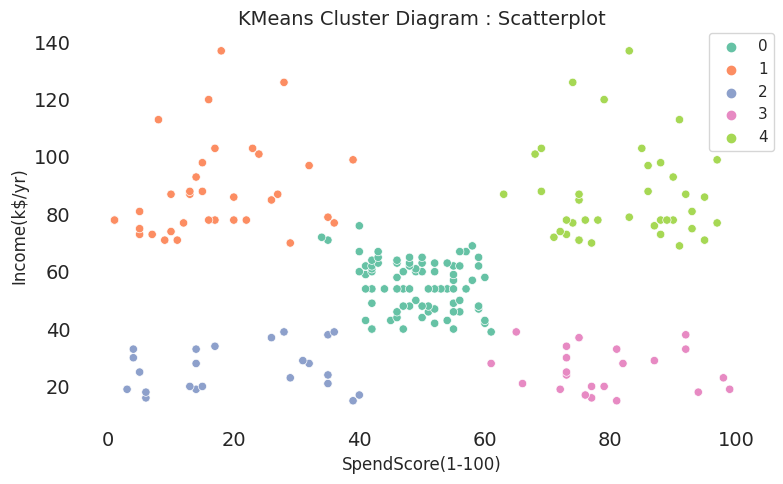

In [20]:
## Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('KMeans Cluster Diagram : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Kmeans, x='SpendScore(1-100)', y='Income(k$/yr)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

In [21]:
## Let's start the Hierarchial analysis by normalizing the data and 
## building a dataframe for analysis

norm = MinMaxScaler()

X_Hierar = norm.fit_transform(X)
X_Hierar = pd.DataFrame(X_Hierar, columns=X.columns)
print(X_Hierar.head(5))

   Income(k$/yr)  SpendScore(1-100)
0       0.000000           0.387755
1       0.000000           0.816327
2       0.008197           0.051020
3       0.008197           0.775510
4       0.016393           0.397959


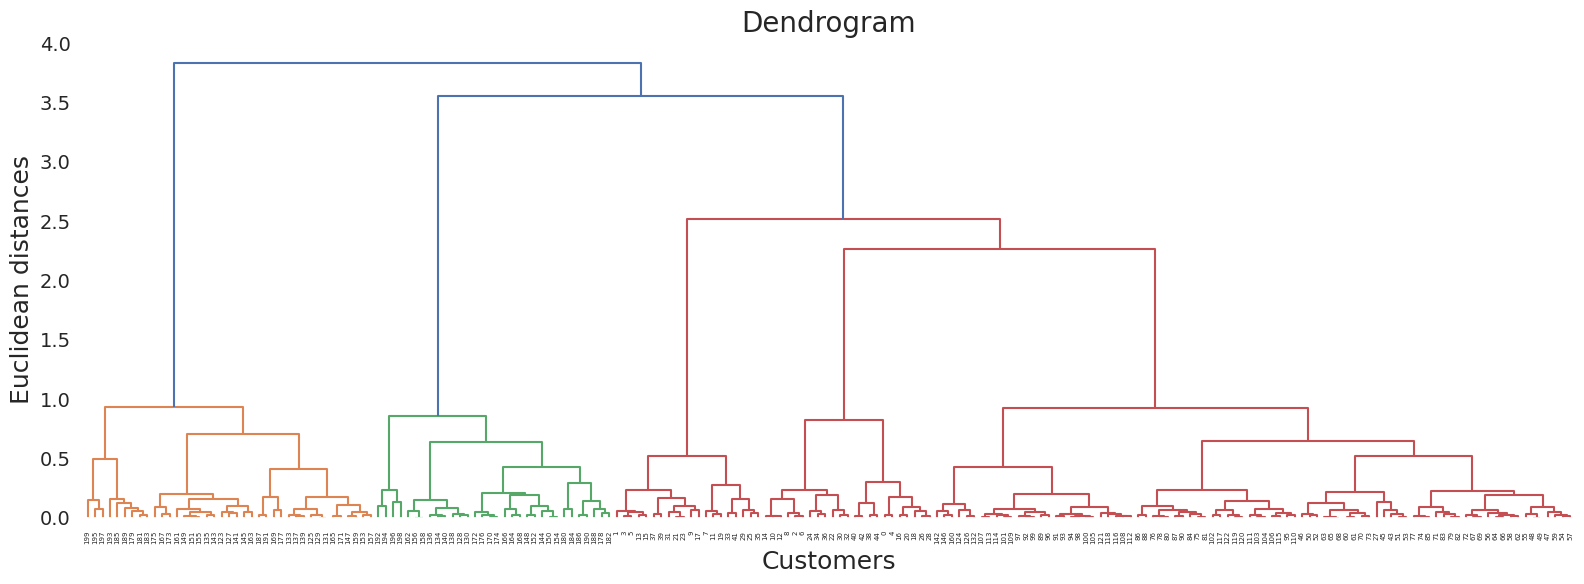

In [22]:
## Build dendrogram to find out the optimal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

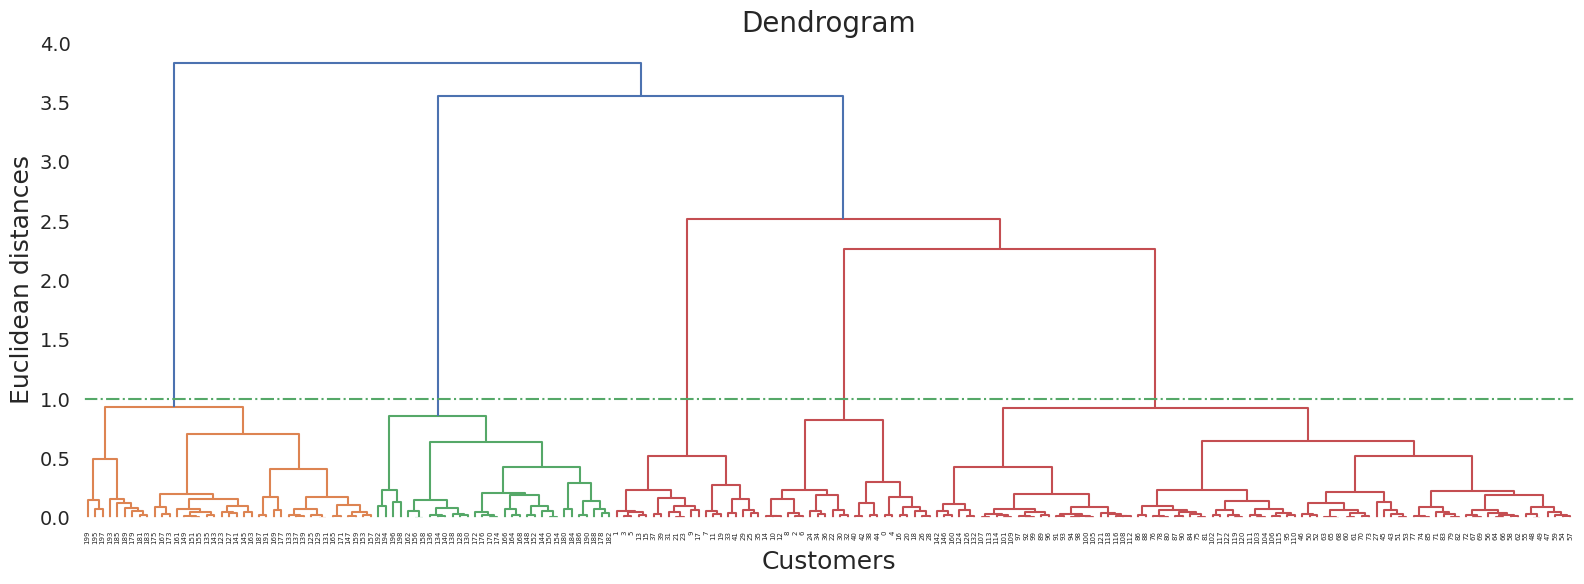

In [23]:
## Draw the threshold level to identify the ideal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')

plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

In [24]:
## Model fitting with 5 clusters

clusters = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_kmeans = clusters.fit_predict(X_Hierar)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [25]:
## Creating a New Dataframe with an appended cluster column

df_Hierar = df.copy()   ## making a copy of original dataframe
df_Hierar['Cluster'] = y_kmeans  ## appending the cluster column
print(df_Hierar.head(5))

   Gender  Age  Income(k$/yr)  SpendScore(1-100)  Cluster
0    Male   19             15                 39        4
1    Male   21             15                 81        3
2  Female   20             16                  6        4
3  Female   23             16                 77        3
4  Female   31             17                 40        4


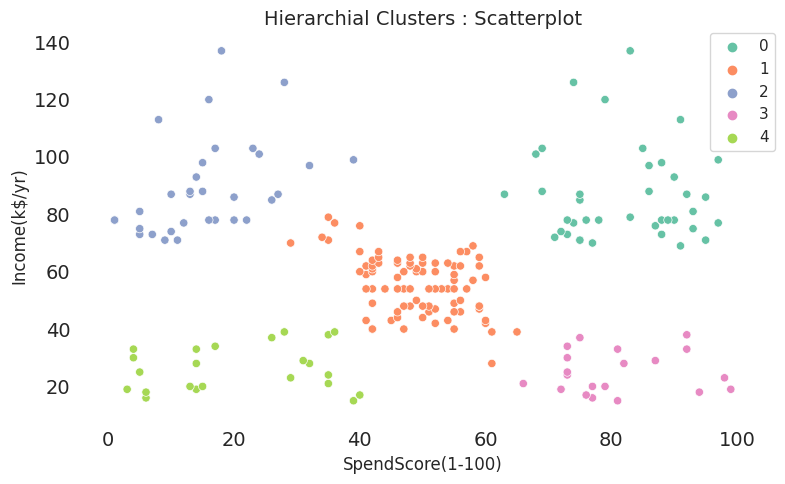

In [26]:
## Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Hierar, x='SpendScore(1-100)', y='Income(k$/yr)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

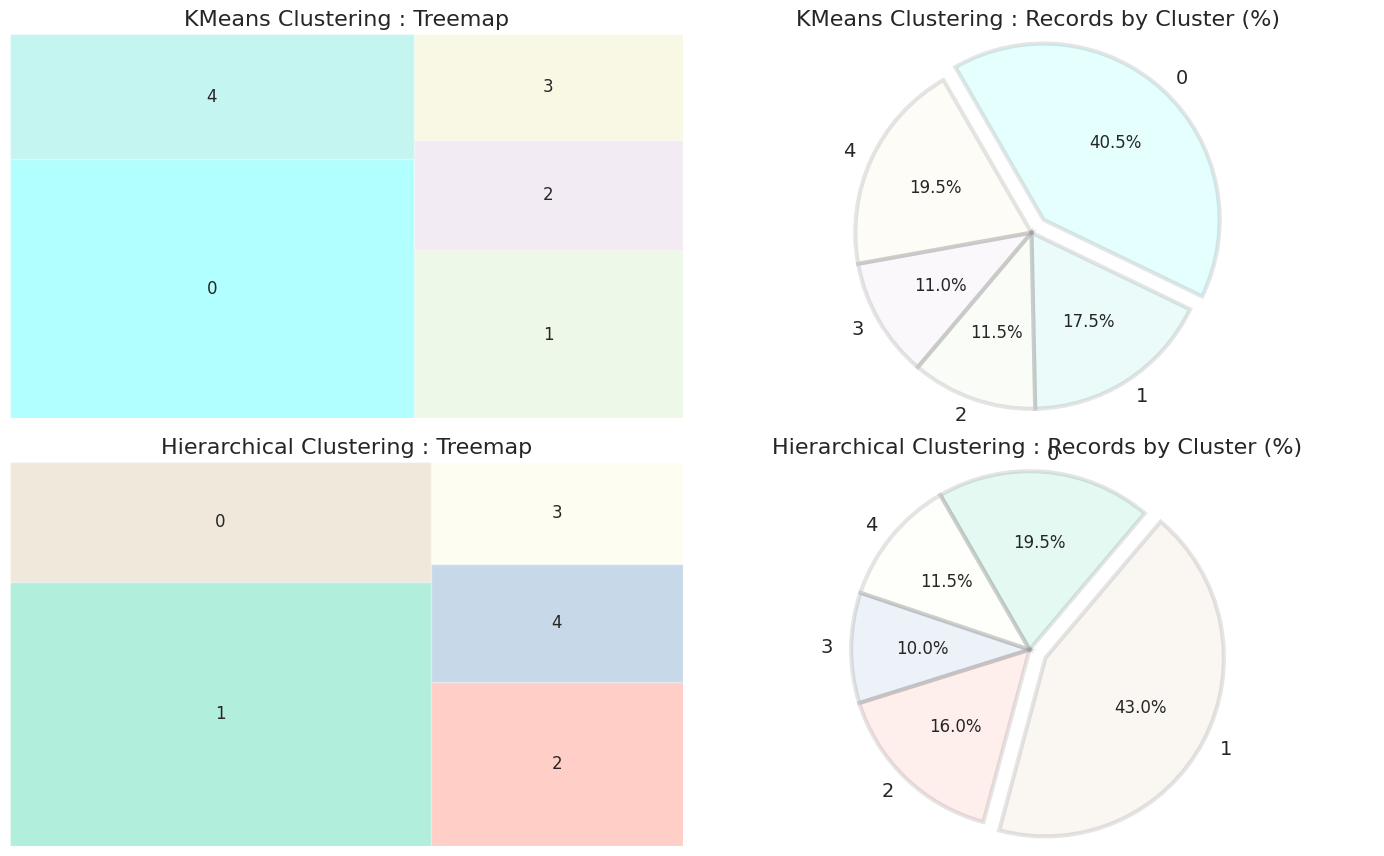

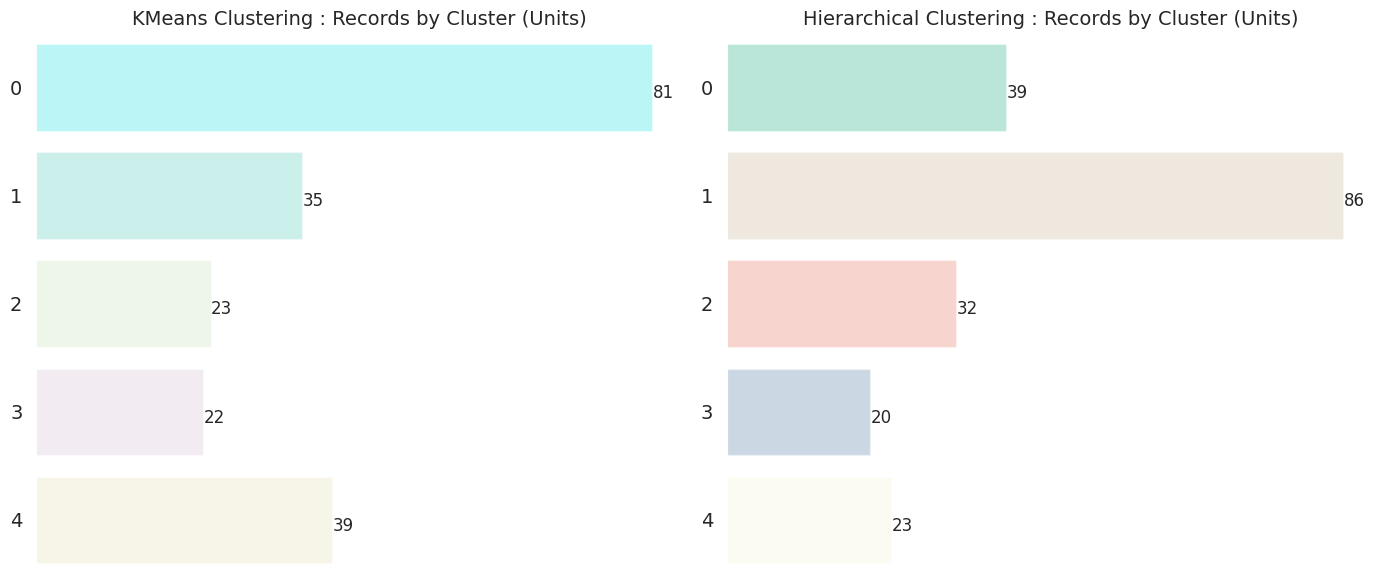

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

def plot_cluster_summary(df_dict, titles, palette_list):
    """
    df_dict: dict of {name: DataFrame_with_Cluster}
    titles: list of titles matching keys order
    palette_list: list of color palettes for each clustering method
    """
    plt.subplots(figsize=(14, 13))

    for idx, (name, df) in enumerate(df_dict.items()):
        cluster_counts = df['Cluster'].value_counts()

        # Treemap
        plt.subplot(3, 2, idx*2 + 1)
        plt.title(f'{titles[idx]} : Treemap', fontsize=16)
        if not cluster_counts.empty:
            squarify.plot(
                sizes=cluster_counts.values,
                label=cluster_counts.index.tolist(),
                color=palette_list[idx],
                alpha=0.3
            )
        else:
            plt.text(0.5, 0.5, "No Clusters", ha='center', va='center')
        plt.axis('off')

        # Pie chart
        plt.subplot(3, 2, idx*2 + 2)
        plt.title(f'{titles[idx]} : Records by Cluster (%)', fontsize=16)
        total = cluster_counts.sum()
        if total > 0:
            sizes = cluster_counts.sort_index() / total * 100
            labels = sizes.index
            my_xpl = [0.1 if i == sizes.idxmax() else 0 for i in labels]
            plt.pie(
                sizes,
                labels=labels,
                colors=palette_list[idx],
                explode=my_xpl,
                counterclock=False,
                startangle=120,
                wedgeprops={
                    'alpha': 0.1,
                    'edgecolor': 'black',
                    'linewidth': 3,
                    'antialiased': True
                },
                autopct='%1.1f%%'
            )
        else:
            plt.text(0, 0, "No Data", ha='center', va='center')
        plt.axis('equal')

    plt.tight_layout()
    plt.show()

    # Bar plots
    plt.subplots(figsize=(14, 6))
    for idx, (name, df) in enumerate(df_dict.items()):
        plt.subplot(1, len(df_dict), idx+1)
        plt.title(f'{titles[idx]} : Records by Cluster (Units)', fontsize=14)
        if not df['Cluster'].empty:
            ax = sns.countplot(
                y="Cluster",
                data=df,
                palette=palette_list[idx],
                alpha=0.3
            )
            for p in ax.patches:
                ax.annotate(
                    '{:.0f}'.format(p.get_width()),
                    (p.get_x() + p.get_width() + 0.05, p.get_y() + 0.5)
                )
            plt.ylabel(None)
            plt.xlabel(None)
            plt.xticks([])
        else:
            plt.text(0.5, 0.5, "No Clusters", ha='center', va='center')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_cluster_summary(
    df_dict={
        'KMeans': df_Kmeans,
        'Hierarchical': df_Hierar
        # You can also add: 'DBSCAN': df_DBSCAN
    },
    titles=['KMeans Clustering', 'Hierarchical Clustering'],
    palette_list=[
        ['#00FFFF','#40E0D0', '#c7e9b4', '#D8BFD8', '#EEE8AA'],  # KMeans colors
        ['#00C78C', '#D2B48C', '#FF6347', '#4682B4','#FAFAD2']   # Hierarchical colors
    ]
)